In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

import datetime
import matplotlib.dates as mdates
from datetime import datetime, timedelta

### Loading Covid-19 case data

Data for confirmed positive cases of Covid-19 per day from 1st January 2021 to 31st October 2021 are imported and plotted 

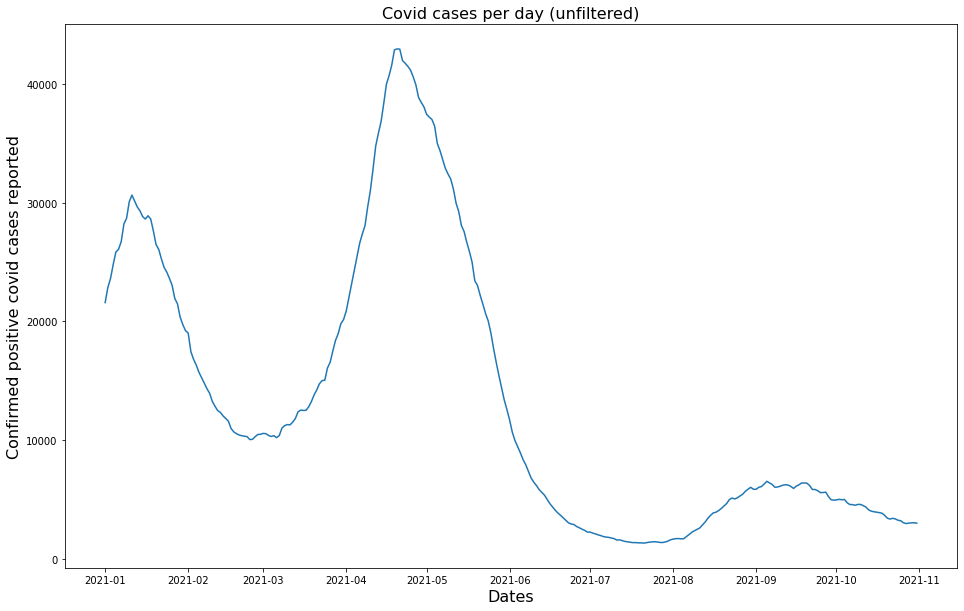

In [166]:
covid_cases = pd.read_csv('covidtesting.csv')

#print(covid_cases.columns)

dates = covid_cases[['Reported Date', 'Confirmed Positive'] ] [330:634] #Data from 1st Jan 2021 to 31st Oct 2021

#print(np.shape(dates))
dates_array = np.array(dates['Reported Date'], dtype = np.datetime64)


cases = np.array(dates['Confirmed Positive'])

#print(dates_array)
#print(caes)

plt.plot(dates_array, cases)
plt.xlabel("Dates")
plt.ylabel("Confirmed positive covid cases reported")
plt.title('Covid cases per day (unfiltered)')
plt.show()




### Filtering Covid-19 Case Data
The confirmed positive cases of Covid-19 per day from 1st January 2021 to 31st October 2021 data is filtered in the frequency domain to remove high frequency noise.

/home/mikdadt/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mikdadt/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mikdadt/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


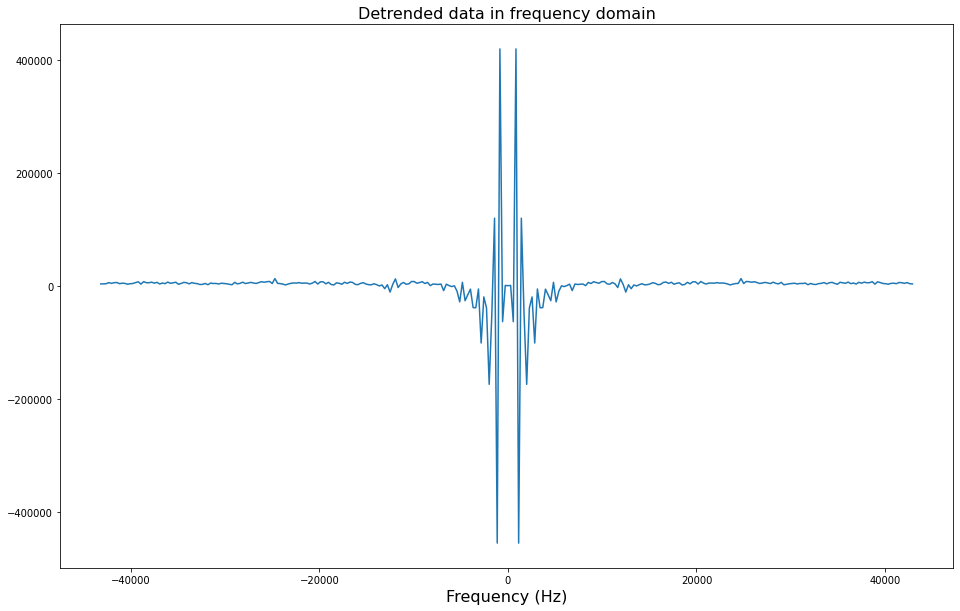

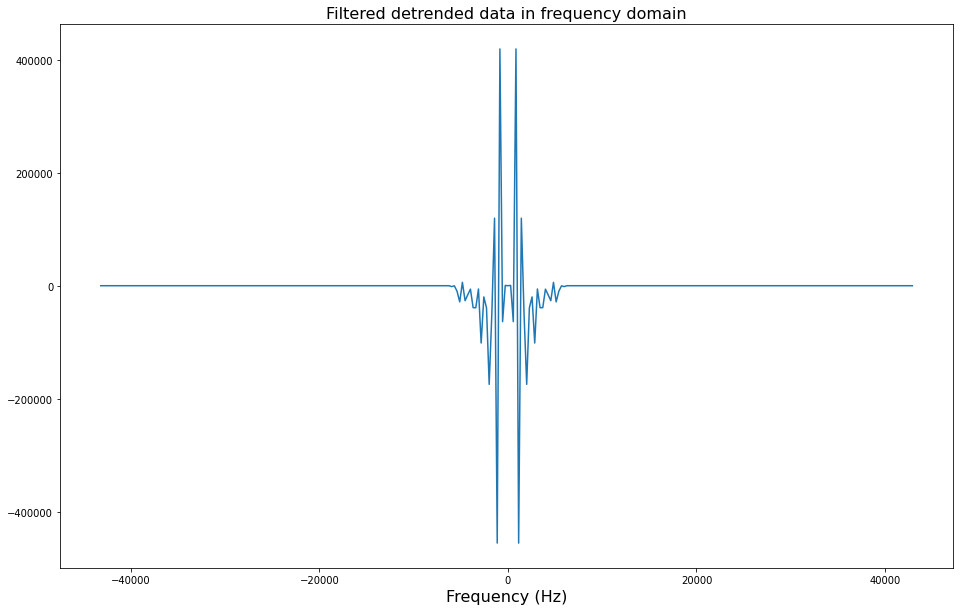

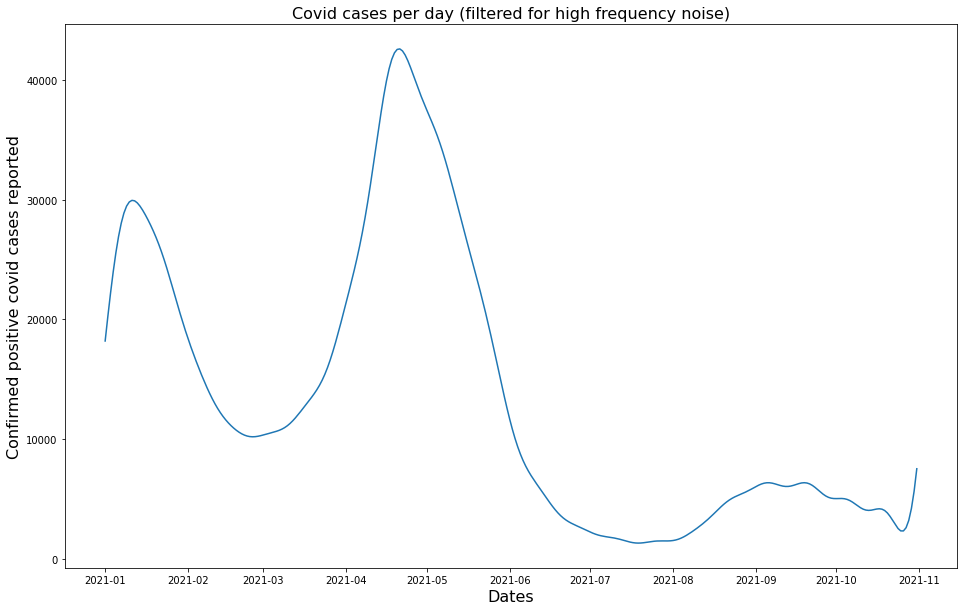

In [167]:
delta = 1 #Sampling rate; here our data is per day
days = np.arange(0, len(dates_array), delta)

# hann = 0.5 * (1 - np.cos(2 * np.pi * days / len(days)))
# cases = cases * hann

fit_positive = np.polyfit(days, cases, 7) 
a = fit_positive[0]
b = fit_positive[1]
c = fit_positive[2]
d = fit_positive[3]
e = fit_positive[4]
f = fit_positive[5]
g = fit_positive[6]
h = fit_positive[7]


fitline = a * days**7 + b * days**6 + c * days**5 + d * days **4 + e * days**3 + f * days **2 + g * days **1 + h * days**0 
# plt.plot(days, cases)
# plt.plot(days, fitline) #Uncomment to see best fit line versus original data

detrend = cases - fitline

# plt.figure()
# plt.plot(days, detrend) #Uncomment to see detrended data

detrend_fft = np.fft.fftshift(np.fft.fft(detrend))
f_axis_detrend = np.fft.fftshift(np.fft.fftfreq(len(detrend), 1/86400)) #Sample rate is per day i.e. per 86400s

plt.figure()
plt.plot(f_axis_detrend, detrend_fft) 
plt.xlabel('Frequency (Hz)')
plt.title('Detrended data in frequency domain')


for i in range(0, len(f_axis_detrend)): #Removing high frequency noise; cutoff determined from above f-domain graph
    if f_axis_detrend[i] < -6000 or f_axis_detrend[i] > 6000 : 
        detrend_fft[i] = 0                                      

     
        
plt.figure()
plt.plot(f_axis_detrend, detrend_fft)
plt.xlabel('Frequency (Hz)')
plt.title('Filtered detrended data in frequency domain')

detrend_ifft = np.fft.ifft(np.fft.ifftshift(detrend_fft))

retrend = detrend_ifft + fitline

plt.figure()
plt.plot(dates_array, retrend)
plt.title('Covid cases per day (filtered for high frequency noise)')
plt.xlabel("Dates")
plt.ylabel("Confirmed positive covid cases reported")
plt.show()
#plt.scatter(days, caes, label = 'original')

### Loading hospitilization data

Data for hospitilizations (including number of people in intensive care unit, and people on ventillators in the
intensive care unit) per day from 1st January 2021 to 31st October 2021 are imported and plotted 

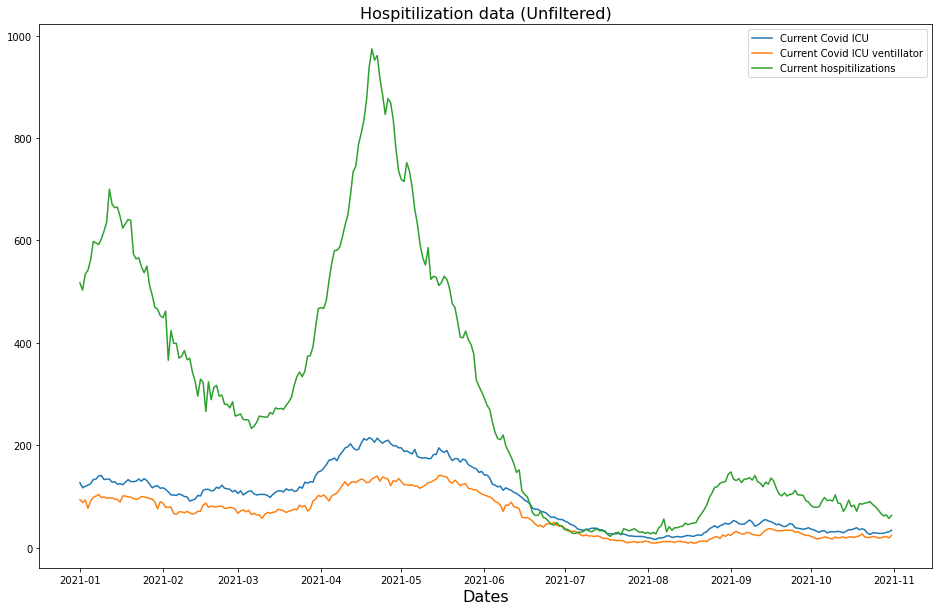

In [172]:
icu_data = pd.read_csv('region_hospital_icu_covid_data.csv')
icu_data_restricted = icu_data[273:577] #Data from 1st Jan 2021 to 31st Oct 2021

icu_dates = icu_data_restricted['date']
icu_dates_array = np.array(icu_dates, dtype = np.datetime64)

icu_current_covid = icu_data_restricted['icu_current_covid']
icu_current_covid_vent = icu_data_restricted['icu_current_covid_vented']
icu_current_hospitilizations = icu_data_restricted['hospitalizations']

plt.figure()
plt.plot(icu_dates_array, icu_current_covid, label = 'Current Covid ICU')
plt.plot(icu_dates_array, icu_current_covid_vent, label = 'Current Covid ICU ventillator')
plt.plot(icu_dates_array, icu_current_hospitilizations, label = 'Current hospitilizations')
plt.legend()
plt.xlabel('Dates')
plt.title('Hospitilization data (Unfiltered)')
plt.show()

### Filtering hospitilization Data
Data for hospitilizations (including number of people in intensive care unit, and people on ventillators in the
intensive care unit) per day from 1st January 2021 to 31st October 2021 is filtered in the frequency domain to remove high frequency noise.

/home/mikdadt/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mikdadt/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mikdadt/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mikdadt/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mikdadt/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mikdadt/.local/lib/python3.10/site-packages/

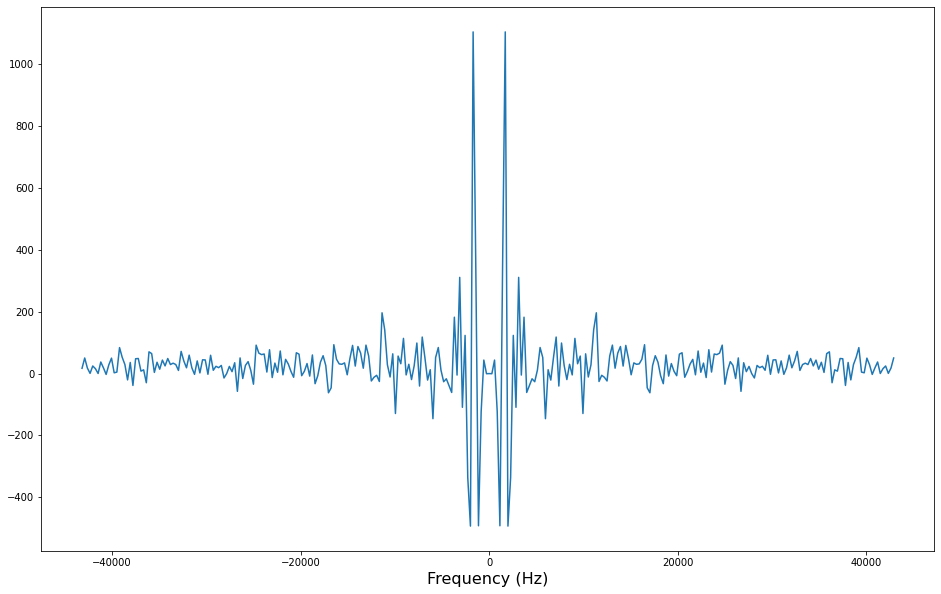

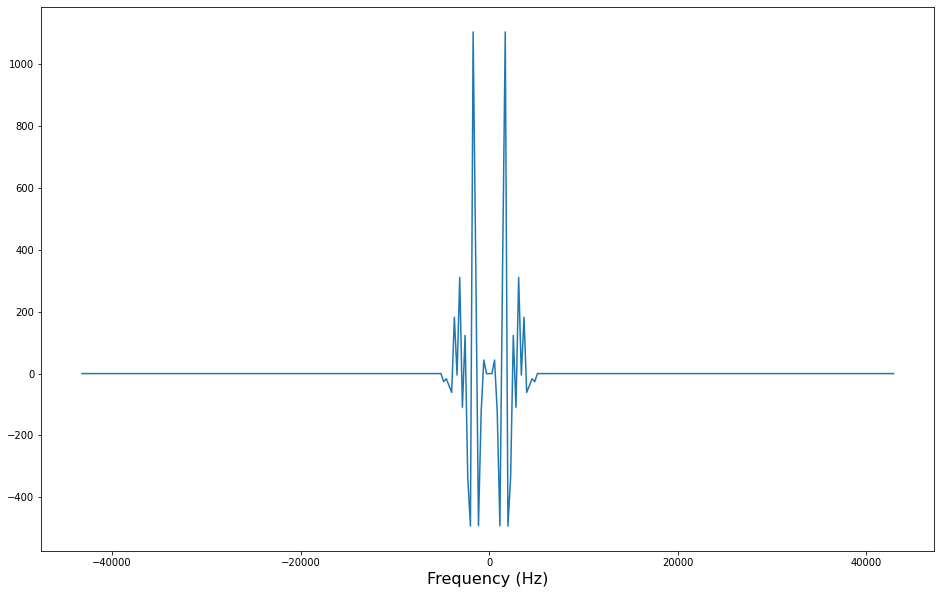

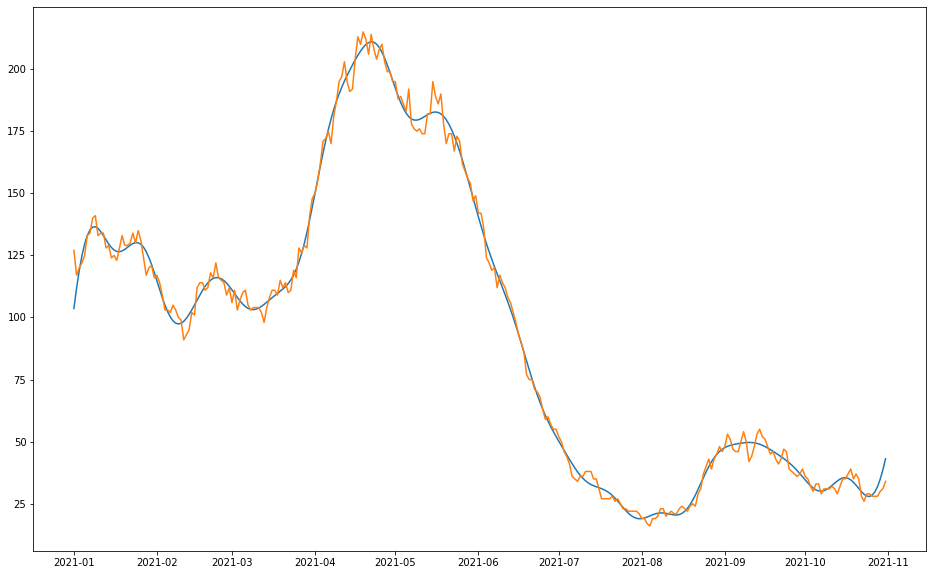

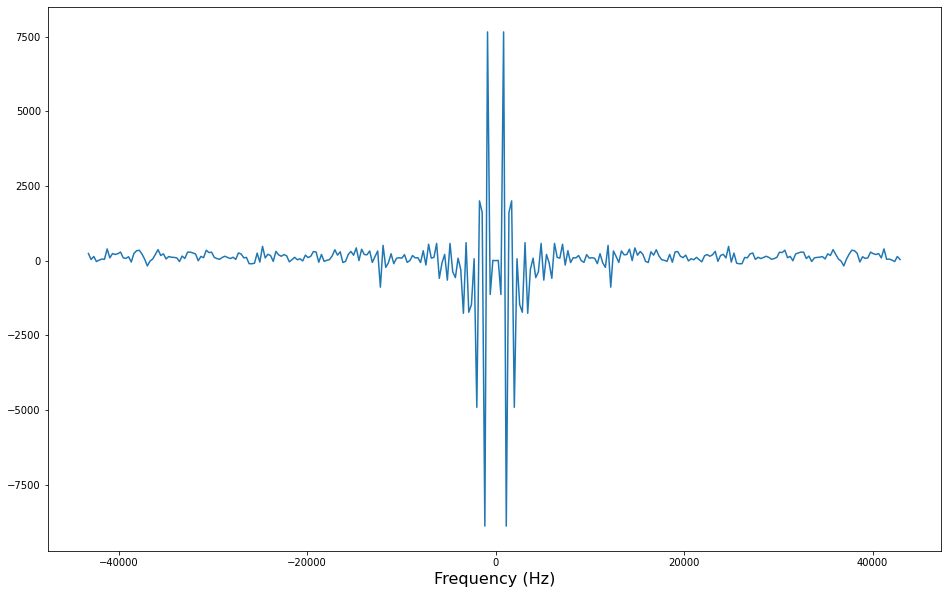

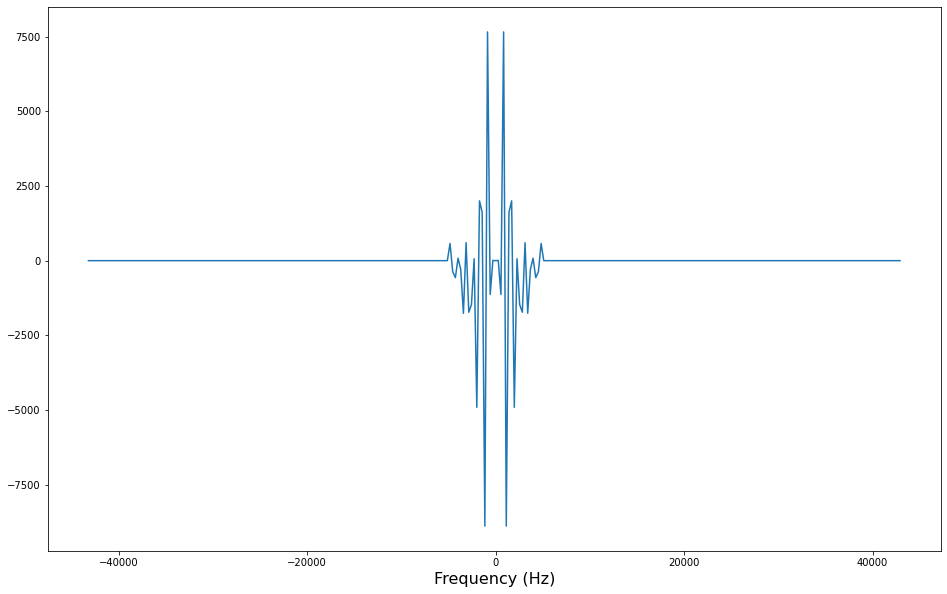

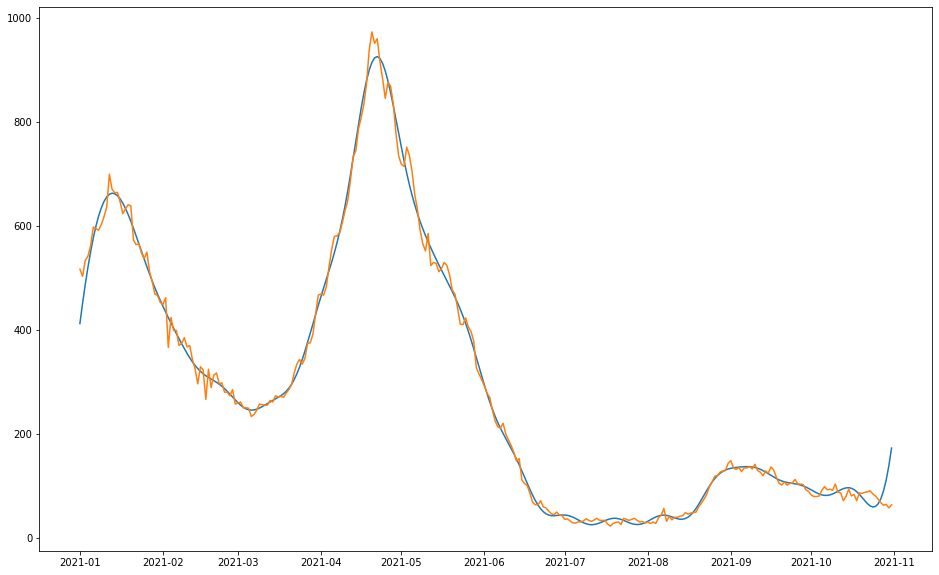

In [173]:
fit_current_covid = np.polyfit(days, icu_current_covid, 7)
a1 = fit_current_covid[0]
b1 = fit_current_covid[1]
c1 = fit_current_covid[2]
d1 = fit_current_covid[3]
e1 = fit_current_covid[4]
f1 = fit_current_covid[5]
g1 = fit_current_covid[6]
h1 = fit_current_covid[7]

fit_line_current_covid = fitline = a1 * days**7 + b1 * days**6 + c1 * days**5 + d1 * days **4 + e1 * days**3 + f1 * days **2 + g1 * days **1 + h1 * days**0 

detrend_current_covid = icu_current_covid - fit_line_current_covid

detrend_current_covid_fft = np.fft.fftshift(np.fft.fft(detrend_current_covid))
f_axis_detrend = f_axis_detrend #Same sampling rate, same time period so same frequency axis as before

plt.figure()
plt.plot(f_axis_detrend, detrend_current_covid_fft)
plt.xlabel('Frequency (Hz)')

for i in range(0, len(f_axis_detrend)): #Removing high frequency noise; cutoff determined from above f-domain graph
    if f_axis_detrend[i] < -5000 or f_axis_detrend[i] > 5000 : 
        detrend_current_covid_fft[i] = 0
        
plt.figure()
plt.plot(f_axis_detrend, detrend_current_covid_fft)
plt.xlabel('Frequency (Hz)')

detrend_current_covid_ifft = np.fft.ifft(np.fft.ifftshift(detrend_current_covid_fft))

retrend_current_covid = detrend_current_covid_ifft + fit_line_current_covid

plt.figure()
plt.plot(dates_array, retrend_current_covid)
plt.plot(dates_array, icu_current_covid)


fit_current_vent = np.polyfit(days, icu_current_covid_vent, 7)
a2 = fit_current_vent[0]
b2 = fit_current_vent[1]
c2 = fit_current_vent[2]
d2 = fit_current_vent[3]
e2 = fit_current_vent[4]
f2 = fit_current_vent[5]
g2 = fit_current_vent[6]
h2 = fit_current_vent[7]

fit_line_current_vent = a2 * days**7 + b2 * days**6 + c2 * days**5 + d2 * days **4 + e2 * days**3 + f2 * days **2 + g2 * days **1 + h2 * days**0 

# plt.figure()
# plt.plot(dates_array, icu_current_covid_vent)
# plt.plot(dates_array, fit_line_current_vent)

detrend_current_vent = icu_current_covid_vent - fit_line_current_vent

# plt.figure()
# plt.plot(dates_array, detrend_current_vent)

detrend_current_vent_fft = np.fft.fftshift(np.fft.fft(detrend_current_vent))
f_axis_detrend = f_axis_detrend #Same sampling rate, same time period so same frequency axis as before

# plt.figure()
# plt.plot(f_axis_detrend, detrend_current_vent_fft)
# plt.xlabel('Frequency (Hz)')

for i in range(0, len(f_axis_detrend)): #Removing high frequency noise; cutoff determined from above f-domain graph
    if f_axis_detrend[i] < -4000 or f_axis_detrend[i] > 4000 : 
        detrend_current_vent_fft[i] = 0
        
# plt.figure()
# plt.plot(f_axis_detrend, detrend_current_vent_fft)
# plt.xlabel('Frequency (Hz)')

detrend_current_vent_ifft = np.fft.ifft(np.fft.ifftshift(detrend_current_vent_fft))

retrend_current_vent = detrend_current_vent_ifft + fit_line_current_vent

# plt.figure()
# plt.plot(dates_array, retrend_current_vent)
# plt.plot(dates_array, icu_current_covid_vent)




fit_current_hosp = np.polyfit(days, icu_current_hospitilizations, 7)
a3 = fit_current_hosp[0]
b3 = fit_current_hosp[1]
c3 = fit_current_hosp[2]
d3 = fit_current_hosp[3]
e3 = fit_current_hosp[4]
f3 = fit_current_hosp[5]
g3 = fit_current_hosp[6]
h3 = fit_current_hosp[7]

fit_line_hosp = fitline = a3 * days**7 + b3 * days**6 + c3 * days**5 + d3 * days **4 + e3 * days**3 + f3 * days **2 + g3 * days **1 + h3 * days**0 

detrend_current_hosp = icu_current_hospitilizations - fit_line_hosp

detrend_current_hosp_fft = np.fft.fftshift(np.fft.fft(detrend_current_hosp))
f_axis_detrend = f_axis_detrend #Same sampling rate, same time period so same frequency axis as before

plt.figure()
plt.plot(f_axis_detrend, detrend_current_hosp_fft)
plt.xlabel('Frequency (Hz)')

for i in range(0, len(f_axis_detrend)): #Removing high frequency noise; cutoff determined from above f-domain graph
    if f_axis_detrend[i] < -5000 or f_axis_detrend[i] > 5000 : 
        detrend_current_hosp_fft[i] = 0
        
plt.figure()
plt.plot(f_axis_detrend, detrend_current_hosp_fft)
plt.xlabel('Frequency (Hz)')

detrend_current_hosp_ifft = np.fft.ifft(np.fft.ifftshift(detrend_current_hosp_fft))

retrend_current_hosp = detrend_current_hosp_ifft + fit_line_hosp

plt.figure()
plt.plot(dates_array, retrend_current_hosp)
plt.plot(dates_array, icu_current_hospitilizations)




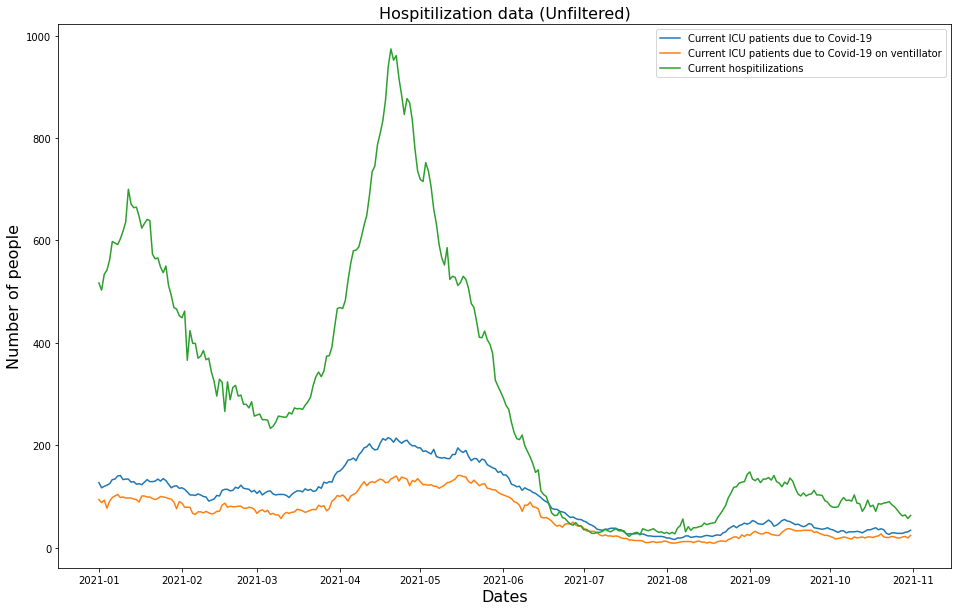

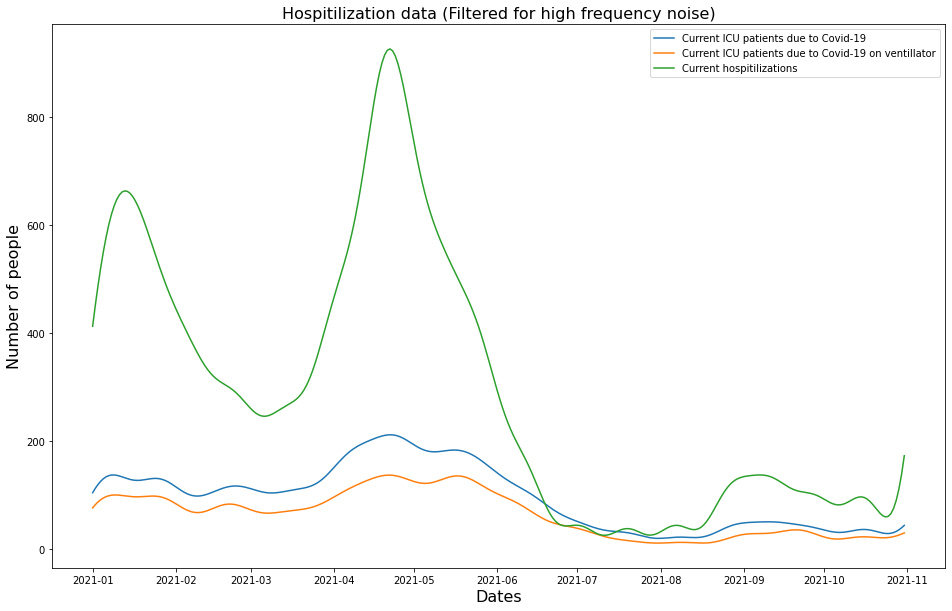

In [174]:
plt.plot(icu_dates_array, icu_current_covid, label = 'Current ICU patients due to Covid-19')
plt.plot(icu_dates_array, icu_current_covid_vent, label = 'Current ICU patients due to Covid-19 on ventillator')
plt.plot(icu_dates_array, icu_current_hospitilizations, label = 'Current hospitilizations')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Number of people')
plt.title('Hospitilization data (Unfiltered)')
plt.show()

plt.plot(icu_dates_array, np.real(retrend_current_covid), label = 'Current ICU patients due to Covid-19')
plt.plot(icu_dates_array, np.real(retrend_current_vent), label = 'Current ICU patients due to Covid-19 on ventillator')
plt.plot(icu_dates_array, np.real(retrend_current_hosp), label = 'Current hospitilizations')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Number of people')
plt.title('Hospitilization data (Filtered for high frequency noise)')
plt.show()

### Loading Vaccination data

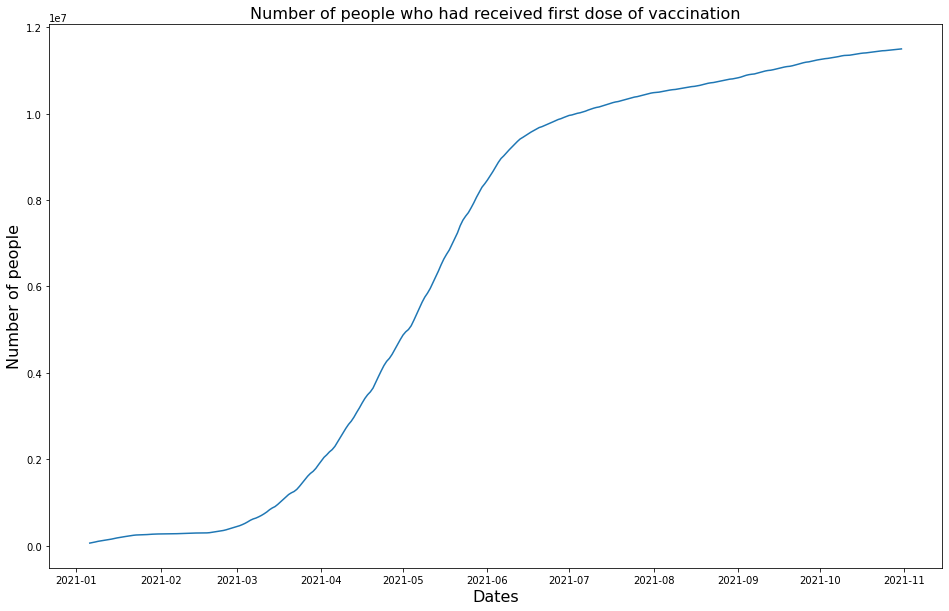

In [150]:
vaccine_data = pd.read_csv('vaccine_doses.csv')

vaccine_data_restricted = vaccine_data[['report_date', 'total_individuals_at_least_one']][3: 307] #Data from 1st Jan 2021 to 31st Oct 2021

vaccine_dates = vaccine_data_restricted['report_date']

vaccine_dates_array = np.array(vaccine_dates, dtype = np.datetime64)

first_vaccine_doses = vaccine_data_restricted['total_individuals_at_least_one']

plt.plot(vaccine_dates_array, first_vaccine_doses)
plt.xlabel('Dates')
plt.ylabel('Number of people')
plt.title('Number of people who had received first dose of vaccination')
plt.show()


### Shifting vaccination data

According to our data, the first dose was administered on January 6th 2021. Our data begins from January 1st 2021, i.e. the first dosage is at the 7th data point. Hence, for the first 7 + 14 data points, noone had received the vaccine for at least 14 days

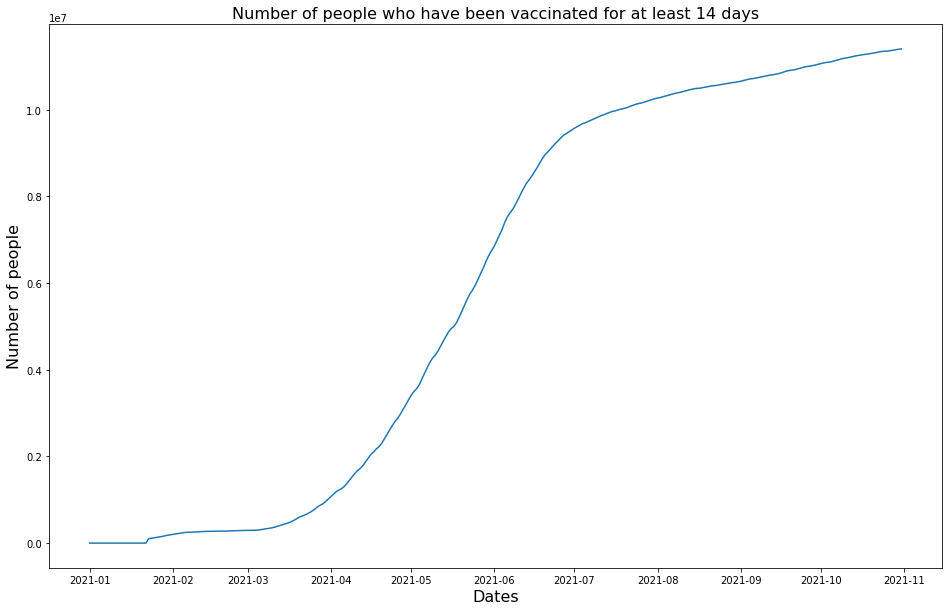

In [149]:
shifted_vaccine = np.roll(first_vaccine_doses, 14)
shifted_vaccine[0: 7 + 14 + 1] = 0 #+1 to account for endpoint
plt.figure()
plt.plot(dates_array, shifted_vaccine)
plt.xlabel('Dates')
plt.ylabel('Number of people')
plt.title('Number of people who have been vaccinated for at least 14 days')
plt.show()
#plt.plot(dates_array, first_vaccine_doses)

Text(0.5, 0, 'Dates')

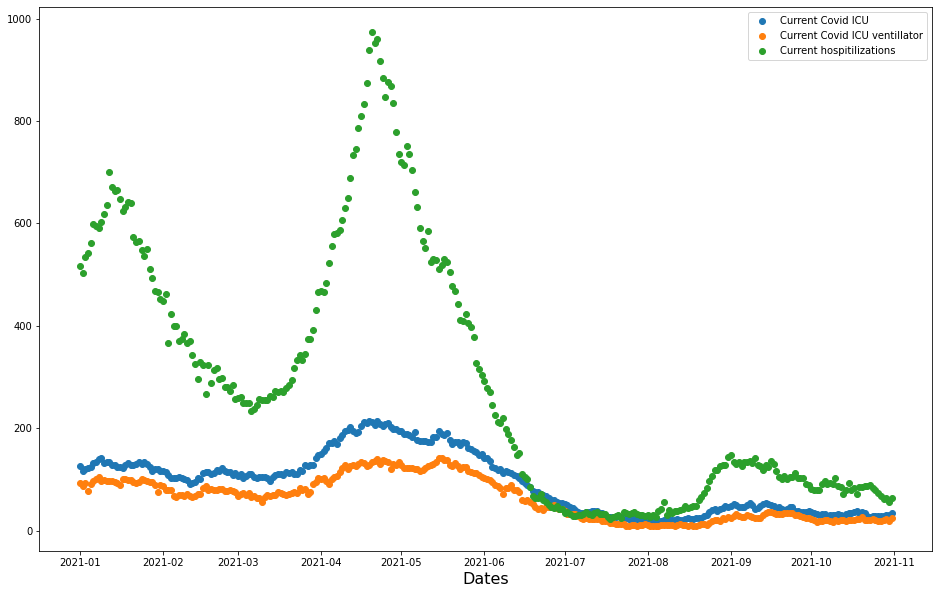

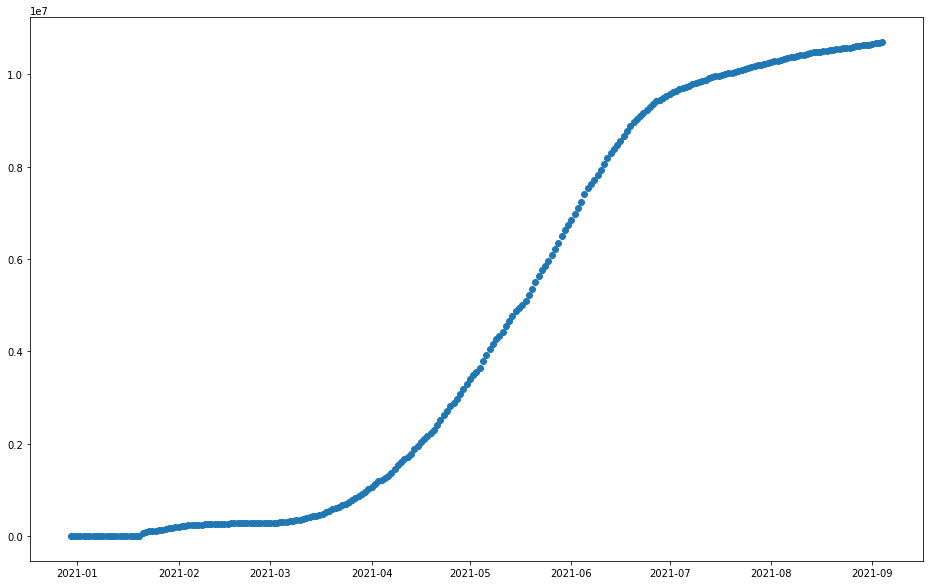

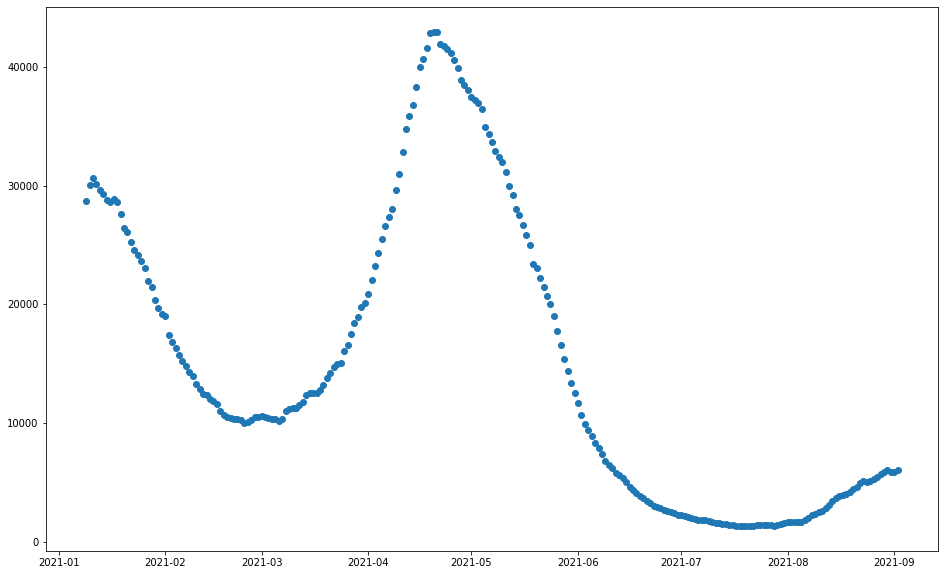

In [5]:
vaccine_data_preshift = pd.read_csv('vaccine_doses.csv')
vaccine_pre_shift_dates = vaccine_data_preshift['report_date']
vaccine_preshift_dates_plot = np.array(vaccine_pre_shift_dates, dtype = np.datetime64)
vaccine_first_dose_preshift = vaccine_data_preshift['total_individuals_at_least_one']

#plt.plot_date(vaccine_preshift_dates_plot, vaccine_first_dose_preshift)

vaccine_preshift_array = np.array(vaccine_first_dose_preshift)
vaccine_shift = np.roll(vaccine_preshift_array, 14)
vaccine_shift[0: 23] = 0 #First dose first given on 6th (data point 9, so for first 9+14 days, noone had first dose)
                         #for at least 14 days

dates_restricted = vaccine_preshift_dates_plot[1: 250]
first_dose_restricted = vaccine_shift[1:250]

plt.figure()
plt.plot_date(dates_restricted, first_dose_restricted)
plt.figure()
plt.plot_date(dates_array, caes)The goal of the report is to analyze any time series data that you find interesting using the methods taught in the course (e.g., FFTs, filtering, cross-correlation and power spectra, etc).


### Cross correlation

As a test, I compute the cross correlation between positive covid-19 cases and hospitilization data. From the graphs, the correlation between the two is already clear

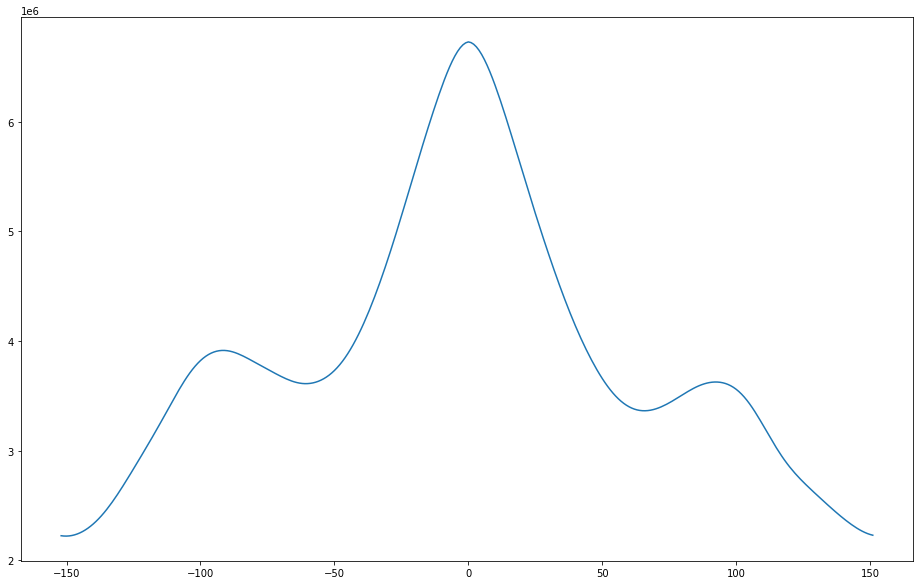

In [159]:
retrend_hosp_fft = np.fft.fft(np.fft.fftshift(np.real(retrend_current_hosp)))
retrend_positive = np.fft.fft(np.fft.fftshift(retrend))

positive_conj = np.conjugate(retrend_positive)

corr_fft = positive_conj * retrend_hosp_fft

corr = np.fft.ifftshift(np.fft.ifft(corr_fft) / len(retrend_current_hosp))

tau = np.arange(-len(days)/2 , len(days)/2 , delta) 

plt.plot(tau, np.real(corr) )